In [35]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [3]:
print("Current working directory: \t", os.getcwd())
os.chdir("/home/tarcisio/Downloads/dataset_dcm")
print("Current working directory: \t", os.getcwd())

Current working directory: 	 /home/tarcisio/Downloads/codes_covid
Current working directory: 	 /home/tarcisio/Downloads/dataset_dcm


# Leitura dos metadados do dataset do Kaggle

Os arquivos "train_image_level" e "train_study_level" serão transformados em dataframe para serem feitas modificações posteriores

In [4]:
train_image_level = pd.read_csv('train_image_level.csv')
train_study_level = pd.read_csv('train_study_level.csv')

# Visualizando os DataFrames

In [5]:
train_image_level

,id,boxes,label,StudyInstanceUID
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e
...,...,...,...,...
6329,ffcc6edd9445_image,NaN,none 1 0 0 1 1,7e6c68462e06
6330,ffd91a2c4ca0_image,NaN,none 1 0 0 1 1,8332bdaddb6e
6331,ffd9b6cf2961_image,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814
6332,ffdc682f7680_image,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d


In [6]:
train_study_level

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852_study,0,1,0,0
1,000c9c05fd14_study,0,0,0,1
2,00292f8c37bd_study,1,0,0,0
3,005057b3f880_study,1,0,0,0
4,0051d9b12e72_study,0,0,0,1
...,...,...,...,...,...
6049,ffcb4630f46f_study,0,1,0,0
6050,ffe4d6e8fbb0_study,0,1,0,0
6051,ffe94fcb14fa_study,0,1,0,0
6052,ffebf1ef4a9c_study,0,1,0,0


Substituindo o nome do arquivo "arquivo_study" na coluna id do dataframe por: "arquivo.png"

In [7]:
train_image_level['id'] = train_image_level['id'].apply(lambda x: f'{x[:12]}'+ ".png")
train_image_level.head()

,id,boxes,label,StudyInstanceUID
0,000a312787f2.png,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000c3a3f293f.png,NaN,none 1 0 0 1 1,ff0879eb20ed
2,0012ff7358bc.png,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7
3,001398f4ff4f.png,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2
4,001bd15d1891.png,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e


In [8]:
train_study_level.head()

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852_study,0,1,0,0
1,000c9c05fd14_study,0,0,0,1
2,00292f8c37bd_study,1,0,0,0
3,005057b3f880_study,1,0,0,0
4,0051d9b12e72_study,0,0,0,1


Vamos usar o 'StudyInstanceUID' para "JUNTAR" o train_study_level + train_image_level, o que queremos é pegar o filename das imagens para organizar

### 1º Passo: Renomear o nome da coluna id para StudyInstanceUID

In [9]:
train_study_level.rename(columns = {'id':'StudyInstanceUID'}, inplace=True)
train_study_level.head()

,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852_study,0,1,0,0
1,000c9c05fd14_study,0,0,0,1
2,00292f8c37bd_study,1,0,0,0
3,005057b3f880_study,1,0,0,0
4,0051d9b12e72_study,0,0,0,1


### 2º Passo: Remover o "_study" dos itens da coluna 'StudyInstanceUID'

In [10]:
train_study_level['StudyInstanceUID'] = train_study_level['StudyInstanceUID'].apply(lambda x: f'{x[:12]}')
train_study_level.head()

,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852,0,1,0,0
1,000c9c05fd14,0,0,0,1
2,00292f8c37bd,1,0,0,0
3,005057b3f880,1,0,0,0
4,0051d9b12e72,0,0,0,1


### 3º Passo: Juntar os dois DataFrames "train_image_level" e "train_study_level"

In [11]:
merged = pd.merge(train_image_level, train_study_level, on='StudyInstanceUID')
merged.head()

,id,boxes,label,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,000a312787f2.png,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,0,1,0,0
1,000c3a3f293f.png,NaN,none 1 0 0 1 1,ff0879eb20ed,1,0,0,0
2,0012ff7358bc.png,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0,1,0,0
3,001398f4ff4f.png,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,0,0,0,1
4,001bd15d1891.png,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,0,1,0,0


## Adicionar uma classe para armazenar as classificações das imagens

In [12]:
merged['class'] = 'default value'
merged.head()

,id,boxes,label,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,class
0,000a312787f2.png,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,0,1,0,0,default value
1,000c3a3f293f.png,NaN,none 1 0 0 1 1,ff0879eb20ed,1,0,0,0,default value
2,0012ff7358bc.png,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0,1,0,0,default value
3,001398f4ff4f.png,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,0,0,0,1,default value
4,001bd15d1891.png,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,0,1,0,0,default value


Caso a imagem seja classificada como:
- 'Negative for Pneumonia == 1' - é atribuída a classe normal;
- 'Typical Appearance == 1' - é atribuída a classe COVID 19;
- 'Atypical Appearance == 1' - é atribuída a classe pneumonia;
- 'Indeterminate Appearance == 1' - é atribuída a classe indeterminado.

In [13]:
for (i,row) in merged.iterrows():
  if row["Negative for Pneumonia"] == 1:
    merged["class"][i] = 'normal'
  elif row["Typical Appearance"] == 1:
    merged["class"][i] = 'COVID-19'
  elif row["Atypical Appearance"] == 1:
    merged["class"][i] = 'pneumonia'
  else:
    merged["class"][i] = 'indeterminado'

<ipython-input-13-88c80ca45f9e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["class"][i] = 'COVID-19'
<ipython-input-13-88c80ca45f9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["class"][i] = 'normal'
<ipython-input-13-88c80ca45f9e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["class"][i] = 'pneumonia'
<ipython-input-13-88c80ca45f9e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [14]:
merged.tail()

,id,boxes,label,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,class
6329,ffcc6edd9445.png,NaN,none 1 0 0 1 1,7e6c68462e06,1,0,0,0,normal
6330,ffd91a2c4ca0.png,NaN,none 1 0 0 1 1,8332bdaddb6e,1,0,0,0,normal
6331,ffd9b6cf2961.png,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,0,1,0,0,COVID-19
6332,ffdc682f7680.png,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,0,1,0,0,COVID-19
6333,ffe942c8655f.png,"[{'x': 208.86463, 'y': 91.53448, 'width': 450....",opacity 1 208.86463 91.53448 659.8321 719.5892...,7d82d53204b8,0,1,0,0,COVID-19


Contando os valores de cada Classe

In [15]:
merged['class'].value_counts()

COVID-19         3007
normal           1736
indeterminado    1108
pneumonia         483
Name: class, dtype: int64

Eliminando as colunas desnecessárias do dataframe

In [16]:
merged.drop('boxes', axis=1, inplace=True)
merged.drop('label', axis=1, inplace=True)
merged.drop('StudyInstanceUID', axis=1, inplace=True)
merged.drop('Negative for Pneumonia', axis=1, inplace=True)
merged.drop('Typical Appearance', axis=1, inplace=True)
merged.drop('Indeterminate Appearance', axis=1, inplace=True)
merged.drop('Atypical Appearance', axis=1, inplace=True)

In [17]:
merged.head()

,id,class
0,000a312787f2.png,COVID-19
1,000c3a3f293f.png,normal
2,0012ff7358bc.png,COVID-19
3,001398f4ff4f.png,pneumonia
4,001bd15d1891.png,COVID-19


Com isso, temos um dataframe contendo as informações do id da imagem e a sua classificação.

In [18]:
merged.to_csv('metadata_ind.csv', header=False, index=True)

É removido as imagens classificadas como "indeterminadas"

In [19]:
final_df = merged.drop(merged[merged['class'] ==  'indeterminado'].index)

In [20]:
final_df['class'].value_counts()

COVID-19     3007
normal       1736
pneumonia     483
Name: class, dtype: int64

Por fim, o dataframe final é salvo como arquivo csv para ser utilizado na etapa de treinamento do modelo

In [21]:
final_df.to_csv('metadata.csv', header=False, index=True)

# Dividindo o dataframe em treino e teste¶


In [22]:
from sklearn.model_selection import train_test_split

Lendo o dataset gerado na etapa passada

In [23]:
df = pd.read_csv('metadata.csv', header=None)

In [24]:
df.head()

,0,1,2
0,0,000a312787f2.png,COVID-19
1,1,000c3a3f293f.png,normal
2,2,0012ff7358bc.png,COVID-19
3,3,001398f4ff4f.png,pneumonia
4,4,001bd15d1891.png,COVID-19


In [25]:
train, test = train_test_split(df, test_size=0.1, random_state=42, shuffle=True)

In [26]:
train.head()

,0,1,2
1038,1279,302436633ec0.png,normal
655,796,1d96a1349a36.png,pneumonia
4876,5900,ecd66bcdc651.png,pneumonia
1609,1967,4b594699ffb2.png,normal
4112,4970,c5b4731a60bb.png,normal


In [27]:
train[2].value_counts()

COVID-19     2712
normal       1558
pneumonia     433
Name: 2, dtype: int64

In [28]:
test.head()

,0,1,2
422,500,11b670d7c7a9.png,COVID-19
3231,3902,987e5110e681.png,COVID-19
23,25,00e3a7e91a34.png,normal
4036,4881,c2221c57b881.png,normal
1957,2387,5b1e5fabcb5d.png,COVID-19


In [29]:
test[2].value_counts()

COVID-19     295
normal       178
pneumonia     50
Name: 2, dtype: int64

Salvando os dataframes de teste e de treino em csv e txt

In [30]:
train.to_csv('train_metadata.csv', header=False, index=False)
test.to_csv('test_metadata.csv', header=False, index=False)

In [31]:
train.to_csv('train_metadata.txt', header=False, index=False,sep=' ')
test.to_csv('test_metadata.txt', header=False, index=False, sep=' ')

# Exemplo de Imagens do Dataset

In [32]:
os.chdir("/home/tarcisio/Downloads/data/train")
print("Current working directory: \t", os.getcwd())


Current working directory: 	 /home/tarcisio/Downloads/data/train


### Imagem Normal

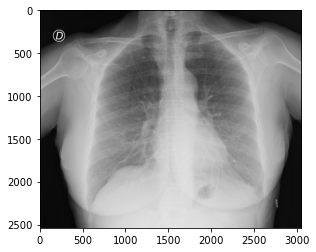

In [37]:
normal_image = cv2.imread("302436633ec0.png")
plt.figure(0)
plt.imshow(normal_image)
plt.show()

### Imagem Covid

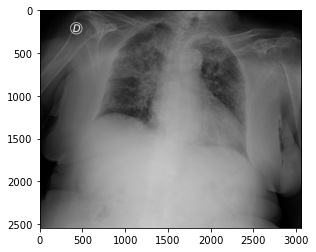

In [38]:
covid_image = cv2.imread("0012ff7358bc.png")
plt.figure(0)
plt.imshow(covid_image)
plt.show()

### Imagem Pneumonia

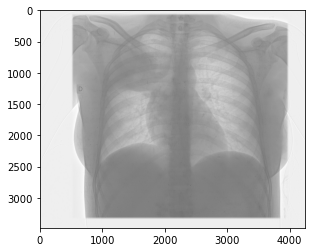

In [39]:
pneumonia_image = cv2.imread("ecd66bcdc651.png")
plt.figure(0)
plt.imshow(pneumonia_image)
plt.show()